<a href="https://colab.research.google.com/github/caojingyu/GEMINI-test/blob/master/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
#install packages#
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron
#import drum data
drum_data = pd.read_csv('/content/audio_data.csv')
#import text data
text_data = pd.read_csv('/content/text_data.csv')
#import animal data
animal_data = pd.read_csv('/content/shelter_data.csv')

In [ ]:
#inspect and clean data
drum_data.head()
drum_data.info()
drum_data.columns
drum_data.isna()
np.where(drum_data == np.nan)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Columns: 133 entries, Unnamed: 0 to 11025.00 hz
dtypes: float64(129), int64(2), object(2)
memory usage: 220.4+ KB


Index(['Unnamed: 0', 'filename', 'label_text', 'label', '0.00 hz', '86.13 hz',
       '172.27 hz', '258.40 hz', '344.53 hz', '430.66 hz',
       ...
       '10249.80 hz', '10335.94 hz', '10422.07 hz', '10508.20 hz',
       '10594.34 hz', '10680.47 hz', '10766.60 hz', '10852.73 hz',
       '10938.87 hz', '11025.00 hz'],
      dtype='object', length=133)

In [ ]:
#text_data.head()
np.where(text_data == np.nan)

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
#animal_data.head()
np.where(animal_data == np.nan)

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
#split datasets
#drum datasets
X_drum = drum_data.drop(['Unnamed: 0', 'filename', 'label_text', 'label'], axis=1)
y_drum = drum_data.label
X_drum_train, X_drum_test, y_drum_train, y_drum_test = train_test_split(X_drum, y_drum, test_size=0.10, random_state=42)

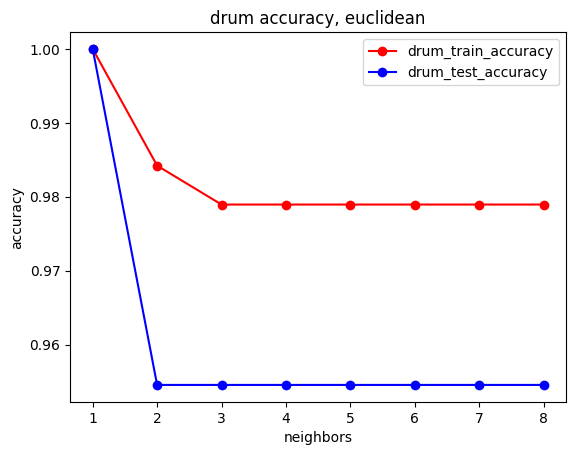

In [ ]:
from sklearn import metrics
#k neighbors for drum datasets
#euclidean
K_train_accuracy = []
K_test_accuracy = []
for i in range(1,9):
  #euclidean 1-9 neighbors classifier
  drum_neighbor = KNeighborsClassifier(n_neighbors=i, metric='minkowski')
  drum_neighbor.fit(X_drum_train, y_drum_train)
  #drum train accuracy
  y_drum_train_pred = drum_neighbor.predict(X_drum_train)
  drum_train_accuracy = accuracy_score(y_drum_train, y_drum_train_pred)
  #drum test accuray
  y_drum_pred = drum_neighbor.predict(X_drum_test)
  drum_test_accuracy = accuracy_score(y_drum_test, y_drum_pred)
  K_train_accuracy.append(drum_train_accuracy)
  K_test_accuracy.append(drum_test_accuracy)
#plot
K_train_accuracy, K_test_accuracy
_ = plt.plot(range(1, 9), K_train_accuracy, color='red', label='drum_train_accuracy', marker='o', linestyle='-')
_ = plt.plot(range(1, 9), K_test_accuracy, color='blue', label='drum_test_accuracy', marker='o', linestyle='-')
_ = plt.xlabel('neighbors')
_ = plt.ylabel('accuracy')
_ = plt.title('drum accuracy, euclidean')
_ = plt.legend()

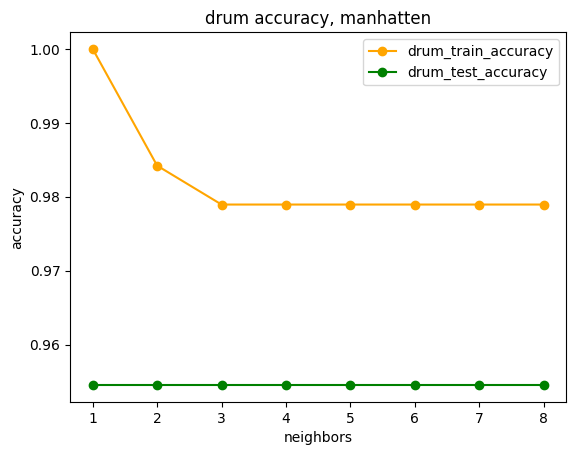

In [ ]:
#manhatten
K_train_accuracy = []
K_test_accuracy = []
for i in range(1,9):
  #euclidean 1-9 neighbors classifier
  drum_neighbor = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
  drum_neighbor.fit(X_drum_train, y_drum_train)
  #drum train accuracy
  y_drum_train_pred = drum_neighbor.predict(X_drum_train)
  drum_train_accuracy = accuracy_score(y_drum_train, y_drum_train_pred)
  #drum test accuray
  y_drum_pred = drum_neighbor.predict(X_drum_test)
  drum_test_accuracy = accuracy_score(y_drum_test, y_drum_pred)
  K_train_accuracy.append(drum_train_accuracy)
  K_test_accuracy.append(drum_test_accuracy)
#plot
K_train_accuracy, K_test_accuracy
_ = plt.plot(range(1, 9), K_train_accuracy, color='orange', label='drum_train_accuracy', marker='o', linestyle='-')
_ = plt.plot(range(1, 9), K_test_accuracy, color='green', label='drum_test_accuracy', marker='o', linestyle='-')
_ = plt.xlabel('neighbors')
_ = plt.ylabel('accuracy')
_ = plt.title('drum accuracy, manhatten')
_ = plt.legend()

In [ ]:
#animal datasets
#one hot encoding to convert categories
animal_onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
animal_dropped = animal_data.drop(['AnimalID', 'Name', 'DateTime'], axis=1)
animal_data_transformed = animal_onehot.fit_transform(animal_dropped, animal_dropped.OutcomeType)
animal_data_new = pd.DataFrame(animal_data_transformed)
animal_data_new.columns = animal_onehot.get_feature_names_out()
#split datasets#
X_animal = animal_data_new.drop(['OutcomeType_Adoption', 'OutcomeType_Died', 'OutcomeType_Euthanasia', 'OutcomeType_Return_to_owner', 'OutcomeType_Transfer'], axis=1)
y_animal = animal_data_new[['OutcomeType_Adoption', 'OutcomeType_Died', 'OutcomeType_Euthanasia', 'OutcomeType_Return_to_owner', 'OutcomeType_Transfer']]
X_animal_train, X_animal_test, y_animal_train, y_animal_test = train_test_split(X_animal, y_animal, test_size=0.10, random_state=42)

In [ ]:
#k neighbor for shelter datasets
K_train_accuracy = []
K_test_accuracy = []
for i in range(1,9):
  #cosine 1-9 neighbors classifier
  animal_neighbor = KNeighborsClassifier(n_neighbors=i, metric='cosine')
  animal_neighbor.fit(X_animal_train, y_animal_train)
  #animal train accuracy
  y_animal_train_pred = animal_neighbor.predict(X_animal_train)
  animal_train_accuracy = accuracy_score(y_animal_train, y_animal_train_pred)
  #animal test accuray
  y_animal_pred = animal_neighbor.predict(X_animal_test)
  animal_test_accuracy = accuracy_score(y_animal_test, y_animal_pred)
  K_train_accuracy.append(animal_train_accuracy)
  K_test_accuracy.append(animal_test_accuracy)

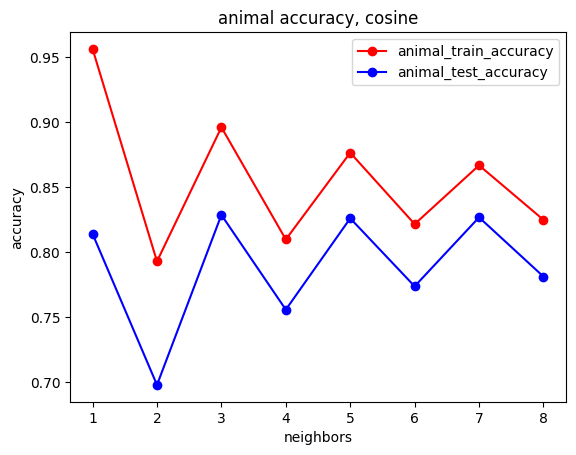

In [ ]:
#plot
_ = plt.plot(range(1,9), K_train_accuracy, color='red', label='animal_train_accuracy', marker='o', linestyle='-')
_ = plt.plot(range(1,9), K_test_accuracy, color='blue', label='animal_test_accuracy', marker='o', linestyle='-')
_ = plt.xlabel('neighbors')
_ = plt.ylabel('accuracy')
_ = plt.title('animal accuracy, cosine')
_ = plt.legend()

In [ ]:
#text datasets
#one hot encoding for categories
text_onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
text_dropped = text_data.drop(['Unnamed: 0', 'meta_title'], axis=1)
text_transformed = text_onehot.fit_transform(text_dropped, text_data.meta_author)
text_data_new = pd.DataFrame(text_transformed)
text_data_new.columns = text_onehot.get_feature_names_out()
#split datasets
X_text = text_data_new.drop(['meta_author_hamilton', 'meta_author_jay', 'meta_author_madison', 'meta_author_madison with hamilton'], axis=1)
y_text = text_data_new[['meta_author_hamilton', 'meta_author_jay', 'meta_author_madison', 'meta_author_madison with hamilton']]
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, y_text, test_size=0.10, random_state=42)

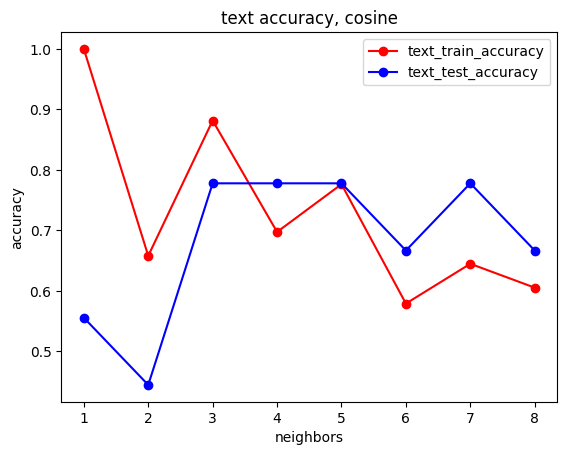

In [ ]:
#k neighbors for text datasets
K_train_accuracy = []
K_test_accuracy = []
for i in range(1,9):
  #cosine 1-9 neighbors classifier
  text_neighbor = KNeighborsClassifier(n_neighbors=i, metric='cosine')
  text_neighbor.fit(X_text_train, y_text_train)
  #text train accuracy
  y_text_train_pred = text_neighbor.predict(X_text_train)
  text_train_accuracy = accuracy_score(y_text_train, y_text_train_pred)
  #text test accuray
  y_text_pred = text_neighbor.predict(X_text_test)
  text_test_accuracy = accuracy_score(y_text_test, y_text_pred)
  K_train_accuracy.append(text_train_accuracy)
  K_test_accuracy.append(text_test_accuracy)
  #plot
_ = plt.plot(range(1,9), K_train_accuracy, color='red', label='text_train_accuracy', marker='o', linestyle='-')
_ = plt.plot(range(1,9), K_test_accuracy, color='blue', label='text_test_accuracy', marker='o', linestyle='-')
_ = plt.xlabel('neighbors')
_ = plt.ylabel('accuracy')
_ = plt.title('text accuracy, cosine')
_ = plt.legend()

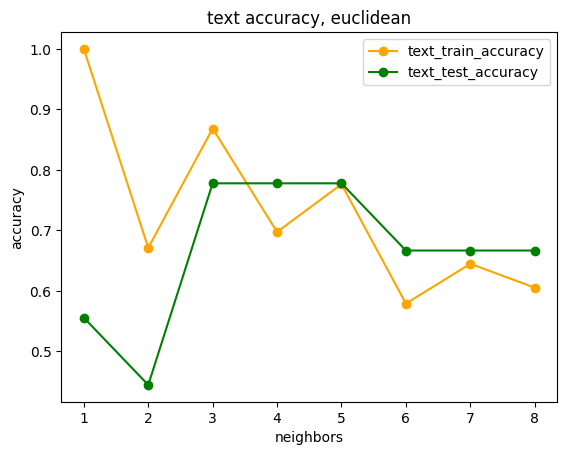

In [ ]:
#k neighbors for text datasets
K_train_accuracy = []
K_test_accuracy = []
for i in range(1,9):
  #cosine 1-9 neighbors classifier
  text_neighbor = KNeighborsClassifier(n_neighbors=i, metric='minkowski')
  text_neighbor.fit(X_text_train, y_text_train)
  #text train accuracy
  y_text_train_pred = text_neighbor.predict(X_text_train)
  text_train_accuracy = accuracy_score(y_text_train, y_text_train_pred)
  #text test accuray
  y_text_pred = text_neighbor.predict(X_text_test)
  text_test_accuracy = accuracy_score(y_text_test, y_text_pred)
  K_train_accuracy.append(text_train_accuracy)
  K_test_accuracy.append(text_test_accuracy)
  #plot
_ = plt.plot(range(1,9), K_train_accuracy, color='orange', label='text_train_accuracy', marker='o', linestyle='-')
_ = plt.plot(range(1,9), K_test_accuracy, color='green', label='text_test_accuracy', marker='o', linestyle='-')
_ = plt.xlabel('neighbors')
_ = plt.ylabel('accuracy')
_ = plt.title('text accuracy, euclidean')
_ = plt.legend()

In [141]:
#perceptron implementation
#label transform
X_drum = drum_data.drop(['Unnamed: 0', 'filename', 'label_text', 'label'], axis=1)
drum_le = LabelEncoder()
drum_data.label = drum_le.fit_transform(drum_data.label)
drum_data[drum_data.label == 0] = -1

In [142]:
#split datasets
X_drum_train, X_drum_test, y_drum_train, y_drum_test = train_test_split(X_drum, y_drum, test_size=0.10, random_state=42)

In [156]:
def predict_perceptron(X, w):
  #activation function
  activation = w[0]
  for i in range(len(X)-1):
    activation += w[i+1] * X[i]
    return 1.0 if activation >= 0.0 else 0.0

#train weights
def train_perceptron(X, y, w):
  for i in range(len(X[0])):
    w = 0.0
    y_pred = predict_perceptron(X, w)
    error = X[-1] - y_pred
    w[0] = w[0] + 0.05 * error
    for i in range(len(X)-1):
      w[i+1] = w[i+1] + 0.05 * error * X[i]
  return w



In [158]:
train_perceptron(X_drum_train, y_drum_train, 0.0)

In [159]:
train_perceptron(X_drum, y_drum, 0.0)

In [ ]:
#perceptron classifier
drum_perceptron = Perceptron()
drum_perceptron.fit(X_drum_train, y_drum_train)
y_drum_predict = drum_perceptron.predict(X_drum_test)
accuracy_score(y_drum_test, y_drum_predict)

1.0